In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
d = pd.read_csv('Bigmart.csv')

In [89]:
df = pd.DataFrame(d)

In [90]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [197]:
df.shape

(8523, 12)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Total rows are 8523

Whereas , Item_weight and Outlet size is showing 7060 and 6113 number of rows respectively

Item_Outlet_Sales is target variable

In [93]:
df['Item_Weight'].isnull().mean()

0.1716531737651062

17 percent of rows are null

In [94]:
df['Outlet_Size'].isnull().mean() # 2410 outliers

0.2827642848762173

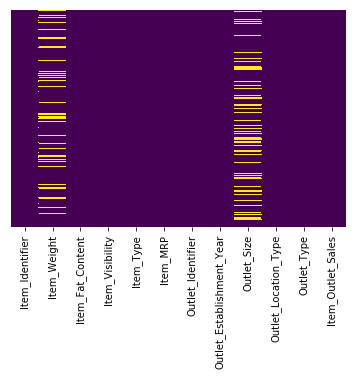

In [95]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
numerical_features = [i for i in df if df[i].dtypes!='O']

In [97]:
year_feature = [i for i in numerical_features if 'Yr' in i or 'Year' in i]

In [98]:
year_feature # one year feature in dataset

['Outlet_Establishment_Year']

Text(0, 0.5, 'Item_Outlet_Sales')

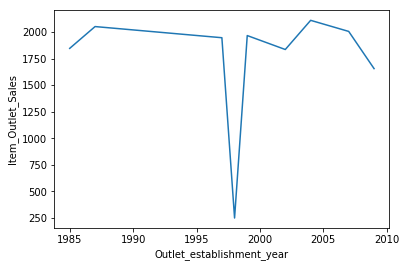

In [99]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Outlet_establishment_year')
plt.ylabel('Item_Outlet_Sales')

Outlet established in between 1995 to 2000 year shows least sales

In [100]:
categorical_features = [i for i in df if df[i].dtypes=='O']

In [101]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [102]:
for i in categorical_features:
    print(i)
    print(df[i].value_counts())
    print('-----------')

Item_Identifier
FDW13    10
FDG33    10
FDT07     9
NCQ06     9
DRE49     9
         ..
FDO33     1
FDY43     1
FDN52     1
FDT35     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64
-----------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-----------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
-----------
Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    

In [104]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

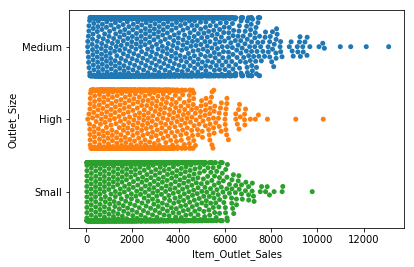

In [105]:
sns.swarmplot(x='Item_Outlet_Sales',y='Outlet_Size',data=df)

In [106]:
df['Outlet_Size'] = np.where(df['Outlet_Size'].isnull(),'Missing',df['Outlet_Size'])

As 2410 rows are null therefore we can not replace it with mode otherwise it will

imbalance the feature therefore

creating the new feature missing

In [107]:
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

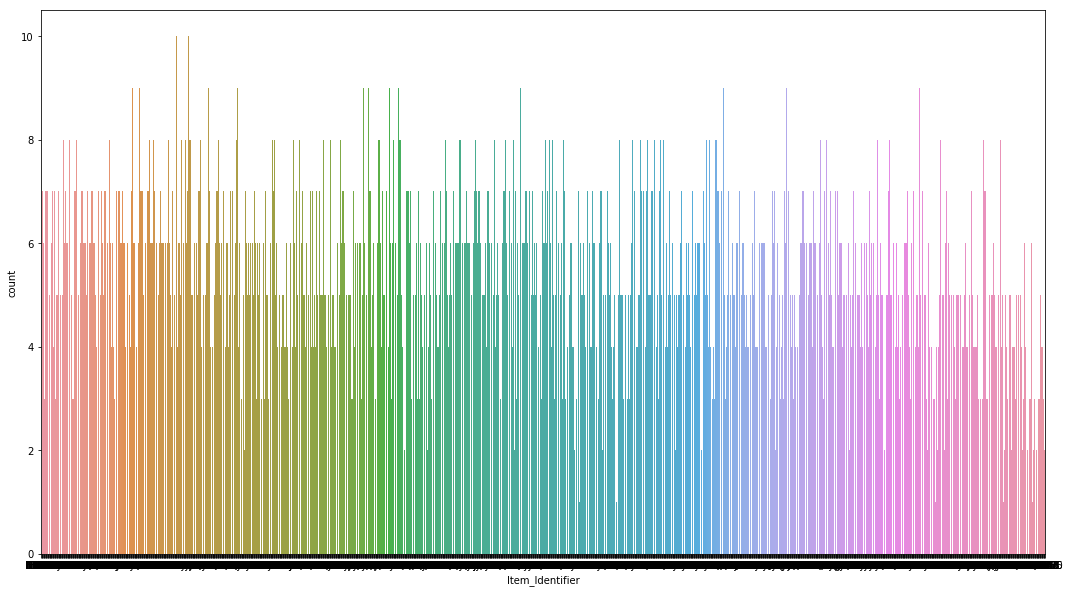

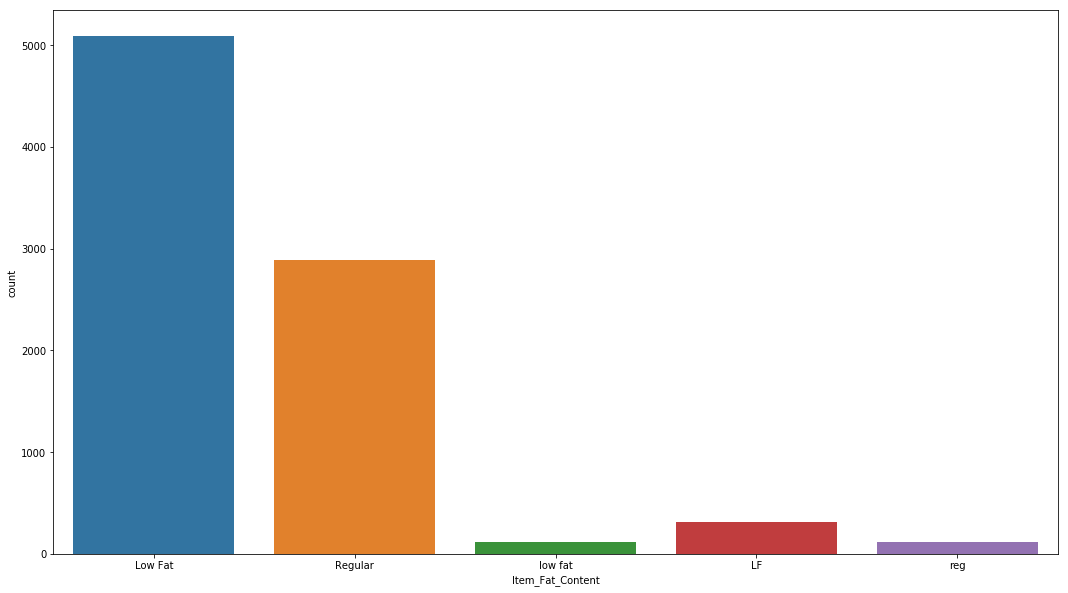

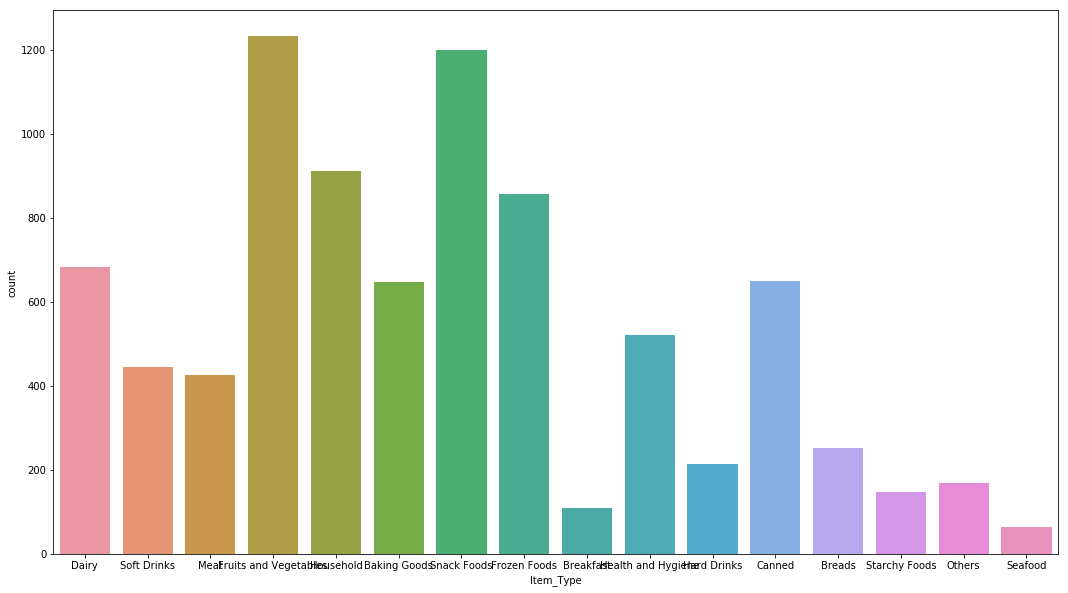

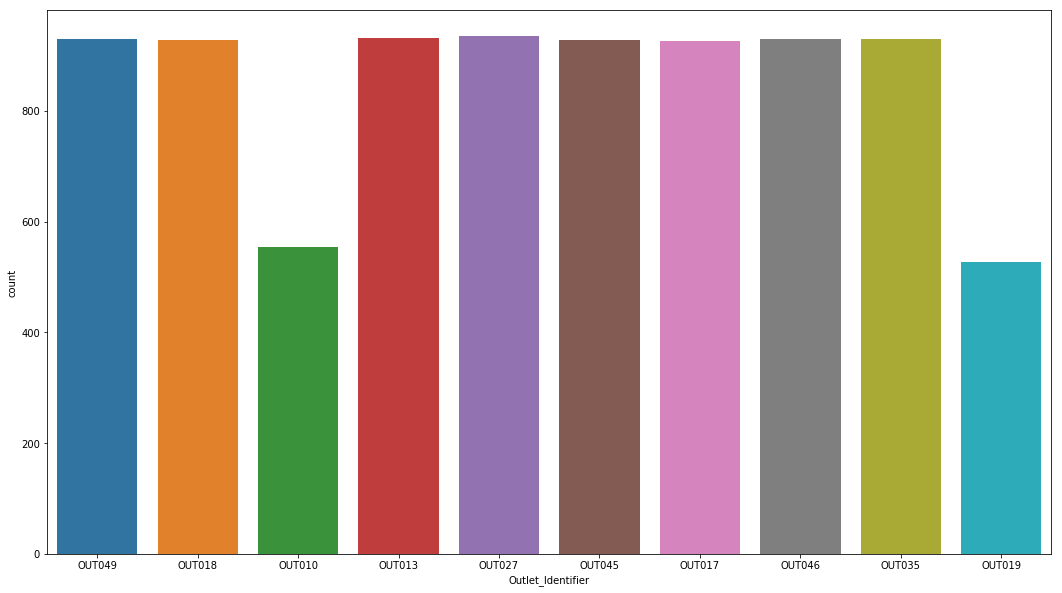

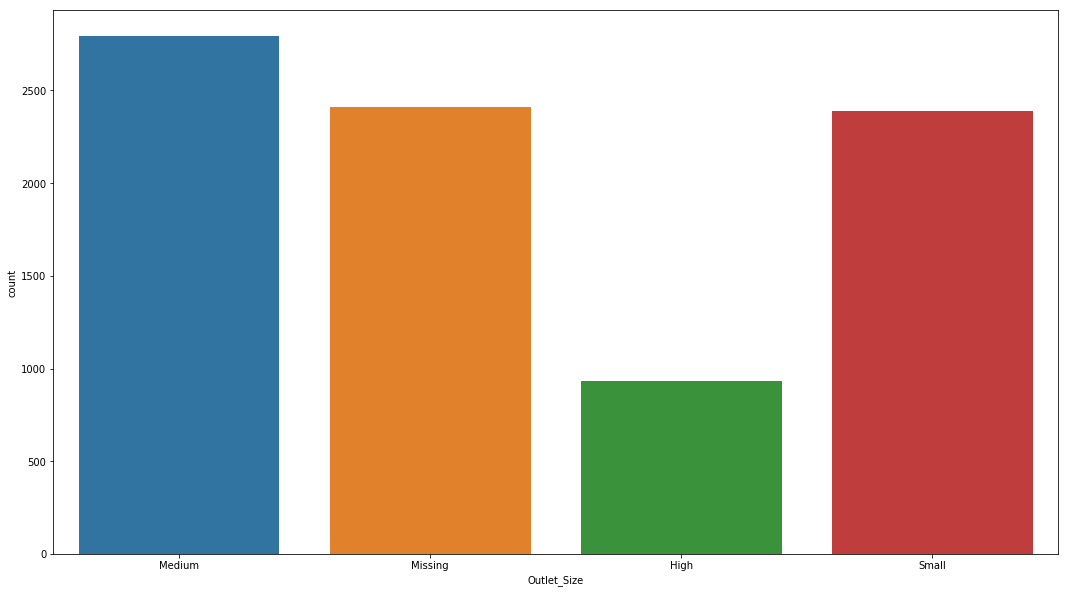

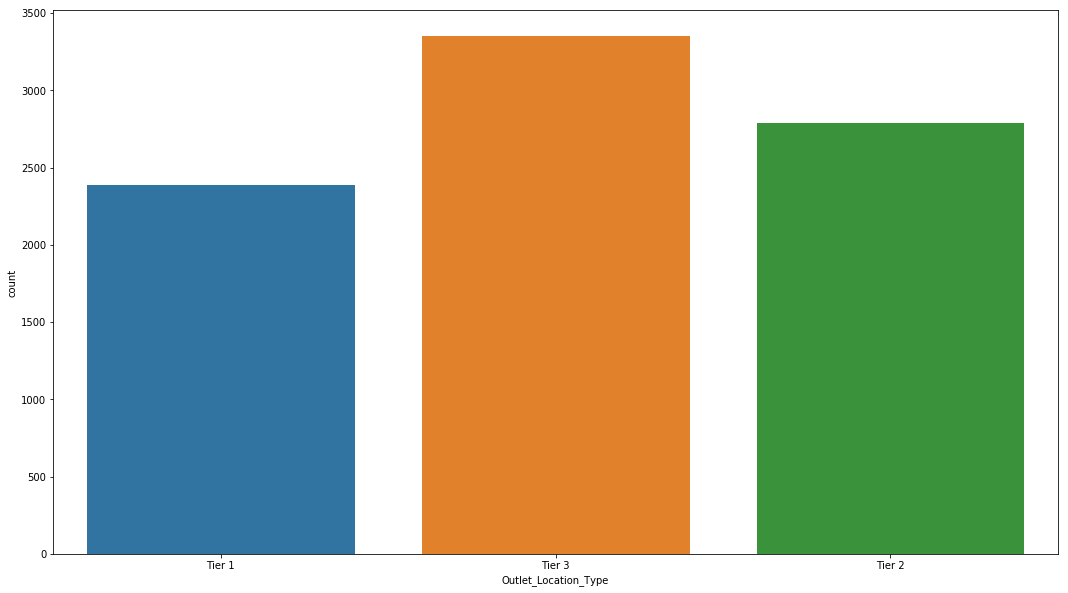

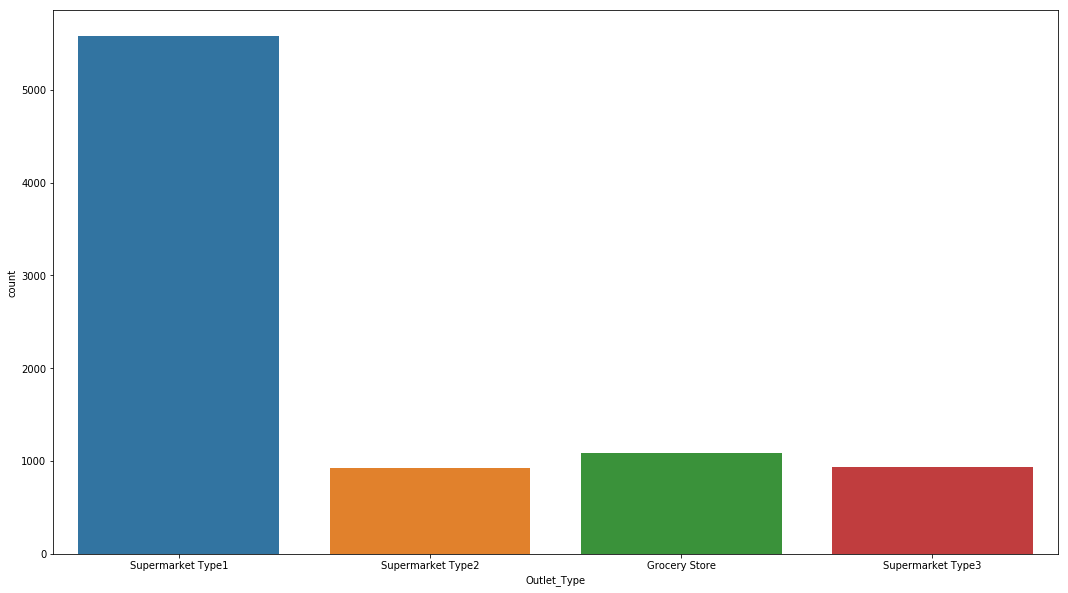

In [108]:
for i in categorical_features:
    plt.figure(figsize=(18,10))
    sns.countplot(df[i])
    plt.show()

Item_type : Seafood has least count

Item_Fat_Content : reg has least count

For other features every category is making valid contribution to the count

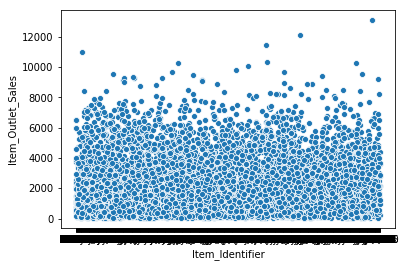

In [109]:
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',data=df)

Item_identifier has no relation with target variable

it is just an unique id of products

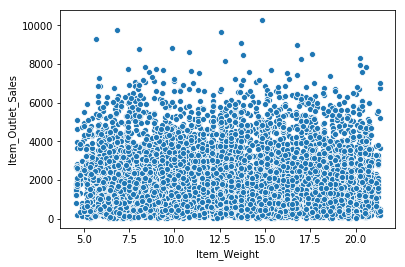

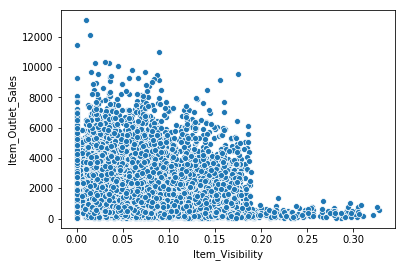

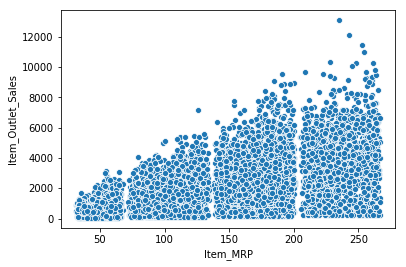

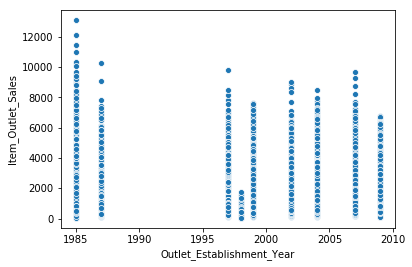

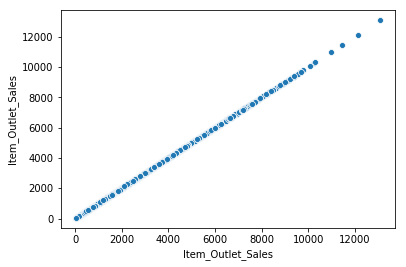

In [110]:
for i in numerical_features:
    sns.scatterplot(x=i,y='Item_Outlet_Sales',data=df)
    plt.show()

Item_weight has no relevant relation with item_sales

Every year sales changes

More Item_MRP more is the Item_Sales

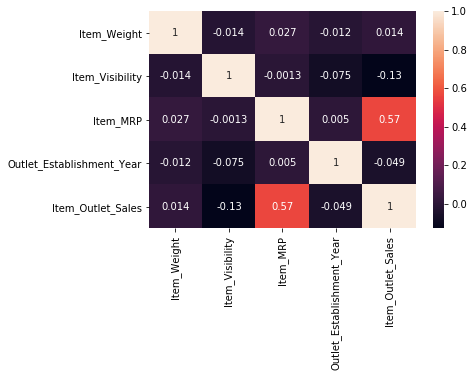

In [111]:
sns.heatmap(df.corr(),annot=True)

Item_weight has least corrleation with Item_Outlet_Sales

Item_MRP has max correlation with Item_Outlet_sales

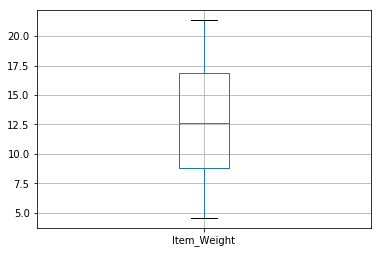

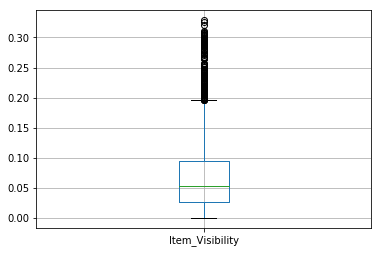

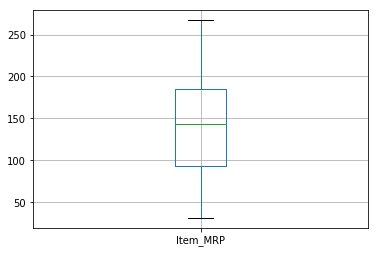

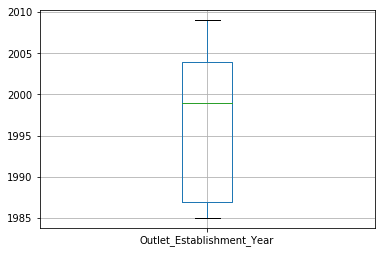

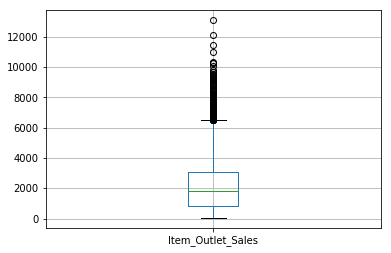

In [112]:
for i in numerical_features:
    df.boxplot(i)
    plt.show()

Item_Outlet_Sales is a target variable

So only Item_Visibility has the outliers

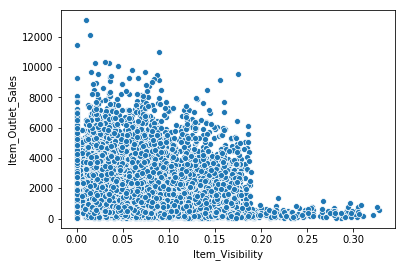

In [113]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

The outliers are from 0.20 to 0.30

In [114]:
df['Item_Visibility'] = np.where(df['Item_Visibility']>0.20,df['Item_Visibility'].median(),df['Item_Visibility'])

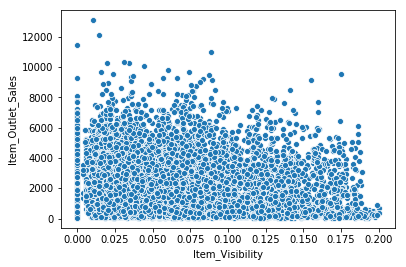

In [115]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
label_encoder = LabelEncoder()
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])

In [119]:
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])

In [120]:
df['Outlet_Identifier']= label_encoder.fit_transform(df['Outlet_Identifier'])

In [121]:
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])

In [122]:
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])

In [123]:
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])

In [124]:
df['Item_Identifier']= label_encoder.fit_transform(df['Item_Identifier'])

In [126]:
df['Item_Weight'] = np.where(df['Item_Weight'].isnull(),df['Item_Weight'].median(),df['Item_Weight'])

In [127]:
x = df.drop('Item_Outlet_Sales',axis=1)

In [128]:
y = df['Item_Outlet_Sales']

In [141]:
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Years, dtype: float64

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=11)

In [131]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train,y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns),'ranking':rfe.ranking_})

In [132]:
selected_feature 

,features,ranking
0,Item_Identifier,7
1,Item_Weight,4
2,Item_Fat_Content,2
3,Item_Visibility,1
4,Item_Type,5
5,Item_MRP,3
6,Outlet_Identifier,1
7,Outlet_Establishment_Year,6
8,Outlet_Size,1
9,Outlet_Location_Type,1


#Performed feature selection to know the significance of each column 

In [133]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)

In [134]:
p = rfe_model.predict(x_test_rfe)

In [139]:
from sklearn.metrics import mean_squared_error
mean_squared_error(p,y_test)

2442867.856234451

In [142]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [143]:
for i in numerical_features:
    print(i,df[i].skew())

Item_Weight 0.12184549575706366
Item_Visibility 0.7611727090528897
Item_MRP 0.1272022683110526
Outlet_Establishment_Year -0.39664078591550556
Item_Outlet_Sales 1.1775306028542798


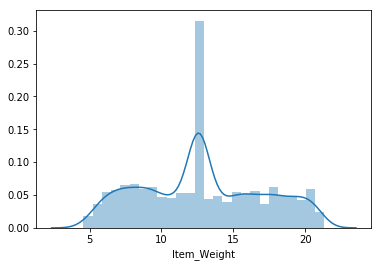

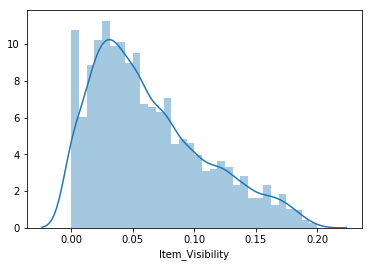

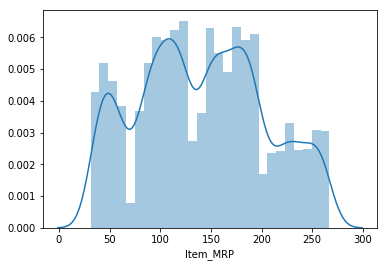

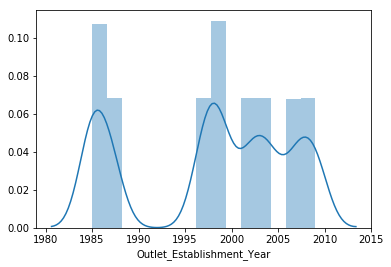

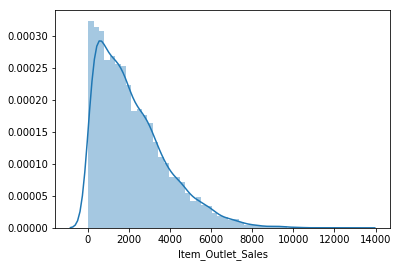

In [144]:
for i in numerical_features:
    sns.distplot(df[i])
    plt.show()

In [145]:
df['Item_MRP'] = np.log(df['Item_MRP'])

In [146]:
df['Item_MRP'].skew()

-0.7357947353046171

In [147]:
df['Item_Visibility'] = np.sqrt(df['Item_Visibility'])

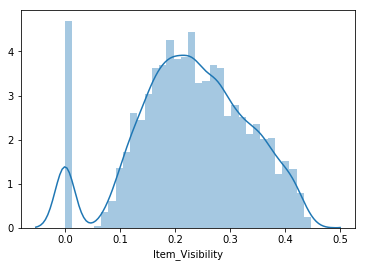

In [149]:
sns.distplot(df['Item_Visibility'])

In [152]:
for i in df['Item_Visibility']:
    if(i<0.1 or i>0.4):
        df['Item_Visibility']  = df['Item_Visibility'].median()
    else:
        pass

In [154]:
df['Item_Visibility'].skew()

0

In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [156]:
df_new = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [157]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,-0.831187,-0.572844,1.0,-0.766479,1.316404,1.507813,0.139541,-0.743350,-1.369334,-0.252658,0.910601,-0.139541
1,-1.630810,0.978092,1.0,1.608963,-1.808494,-0.607071,1.334103,-0.743350,1.091569,1.002972,-1.018440,-1.334103
2,1.108727,-0.572844,1.0,0.658786,0.237521,1.507813,0.139541,-0.743350,-1.369334,-0.252658,-0.049238,-0.139541
3,1.510904,0.978092,1.0,-0.291391,0.715398,-1.664513,0.020085,0.269693,1.091569,-1.508289,-0.849103,-0.020085
4,-0.918719,-0.572844,1.0,0.421242,-1.600117,-1.312032,-1.293934,-1.756393,1.091569,-0.252658,-0.695373,1.293934


In [198]:
df_new.shape

(8523, 11)

In [180]:
df_new.drop('Outlet_Years',axis=1,inplace=True)

In [199]:
df_new.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [183]:
x1 = df_new.drop('Item_Outlet_Sales',axis=1)
y1 = df_new['Item_Outlet_Sales']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [184]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r_score = r2_score(y_test,pred)
    print('random_state',i,r_score)
    


random_state 1 0.47943721004343
random_state 2 0.48948540229724535
random_state 3 0.48712599938515566
random_state 4 0.45895753910707504
random_state 5 0.4765541321814446
random_state 6 0.47320598690009785
random_state 7 0.4626322701016359
random_state 8 0.48794823233100226
random_state 9 0.47985070042223954
random_state 10 0.4726920687442795
random_state 11 0.46942402680746487
random_state 12 0.4860506834184941
random_state 13 0.48336712567091733
random_state 14 0.4745615115251999
random_state 15 0.48348235333685885
random_state 16 0.4807254775957813
random_state 17 0.48182579004195336
random_state 18 0.4701135183847779
random_state 19 0.4790335359951532
random_state 20 0.47696356275027585
random_state 21 0.4847967882626639
random_state 22 0.47516774520280103
random_state 23 0.47054495851965505
random_state 24 0.4734858312814548
random_state 25 0.4902949518757863
random_state 26 0.4708650317509515
random_state 27 0.46951132782417493
random_state 28 0.49591938992974427
random_state 29 

Taking 80 as it is giving best r score

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.33,random_state=80)

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [162]:
list_algo = [LinearRegression,SVR,DecisionTreeRegressor,KNeighborsRegressor]

In [186]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')

<class 'sklearn.linear_model._base.LinearRegression'> mean squared error 0.4865346899018198
rms 0.6975203867284596
---------
<class 'sklearn.svm._classes.SVR'> mean squared error 0.37994798512753464
rms 0.6163992092204001
---------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> mean squared error 0.7889578260481784
rms 0.8882329795994846
---------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> mean squared error 0.4674736378285915
rms 0.6837204383580994
---------


Here decision tree is giving best result

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
lr = LinearRegression()
for i in range(2,21):
    lr.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print('r2_score',r2_score(y_test,pred))
    cross_score = cross_val_score(lr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

r2_score 0.5167729885973131
cv... 2
0.49978165220956366
-------
r2_score 0.5167729885973131
cv... 3
0.5000148171121769
-------
r2_score 0.5167729885973131
cv... 4
0.4986676618651701
-------
r2_score 0.5167729885973131
cv... 5
0.49988077967986155
-------
r2_score 0.5167729885973131
cv... 6
0.49945581475571
-------
r2_score 0.5167729885973131
cv... 7
0.5004268307078098
-------
r2_score 0.5167729885973131
cv... 8
0.4996144984670658
-------
r2_score 0.5167729885973131
cv... 9
0.49984574793568953
-------
r2_score 0.5167729885973131
cv... 10
0.49928796026197375
-------
r2_score 0.5167729885973131
cv... 11
0.4997635005345549
-------
r2_score 0.5167729885973131
cv... 12
0.4992330906571665
-------
r2_score 0.5167729885973131
cv... 13
0.4994286785429016
-------
r2_score 0.5167729885973131
cv... 14
0.49928709360940954
-------
r2_score 0.5167729885973131
cv... 15
0.49930400758794863
-------
r2_score 0.5167729885973131
cv... 16
0.4984232646243406
-------
r2_score 0.5167729885973131
cv... 17
0.49849

Taking cv = 7 as optimal value for kfolds

In [189]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x1,y1,cv=7)
    print('cross score',cross_score.mean())
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')

cross score 0.47850895388988296
<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.49706959896806857
mean squared error 0.4865346899018198
rms 0.6975203867284596
---------
cross score 0.5928938061418797
<class 'sklearn.svm._classes.SVR'> r2_score 0.6072481644216864
mean squared error 0.37994798512753464
rms 0.6163992092204001
---------
cross score 0.15346328294325978
<class 'sklearn.tree._classes.DecisionTreeRegressor'> r2_score 0.16348491665074283
mean squared error 0.8092443921473846
rms 0.8995801199156107
---------
cross score 0.5037584168755405
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.5167729885973131
mean squared error 0.4674736378285915
rms 0.6837204383580994
---------


Here SVR is perfoming better than others 

In [206]:
kernel = ['rbf','poly','linear']

Trying each krenel to get better result

In [208]:
for i in kernel:
    obj = SVR(kernel=i,c=1)
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'r_score',r2_score(y_test,pred))

rbf r_score 0.6072481644216864
poly r_score 0.6069153871756803
linear r_score 0.47765344197119985


rbf kernel is giving best score

In [211]:
svr = SVR(kernel='rbf')
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print(r2_score(y_test,pred))

0.6072481644216864


Saving the model

In [195]:
import pickle

In [212]:
bigmart = 'pkl-file.pkl'
pickle.dump(svr,open(bigmart,'wb'))

conclusion

In [245]:
original_res = np.array(y_test)
pred_res = np.array(svr.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,0.066451,0.066451
1,0.988754,0.988754
2,-0.848171,-0.848171
3,-0.679488,-0.679488
4,0.010037,0.010037
...,...,...
2808,1.384492,1.384492
2809,-1.146343,-1.146343
2810,0.047175,0.047175
2811,0.056965,0.056965


# importing test file

In [177]:
d1  = pd.read_csv('bigmart_test.csv')

In [178]:
df_test = pd.DataFrame(d1)

In [179]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [213]:
df_test.shape

(5681, 11)

In [214]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Same features have the null values as in train dataset

In [215]:
df_test['Outlet_Size'].value_counts() 

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [219]:
df_test['Outlet_Size'] = np.where(df_test['Outlet_Size'].isnull(),'Missing',df_test['Outlet_Size'])

In [220]:
df_test['Item_Weight'] = np.where(df_test['Item_Weight'].isnull(),df_test['Item_Weight'].median(),df_test['Item_Weight'])

In [221]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Using same strategy as in train dataset

In [222]:
df_test.drop('Item_Identifier',axis=1,inplace=True)

Dropping item_identifier as done in train dataset

In [225]:
numerical_features = [i for i in df_test if df_test[i].dtypes!='O']

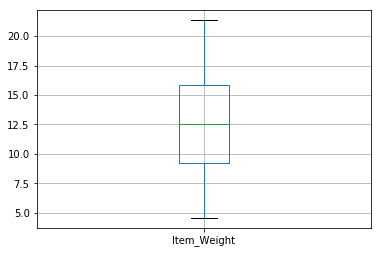

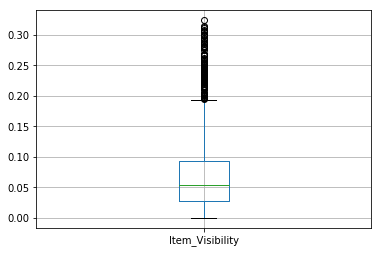

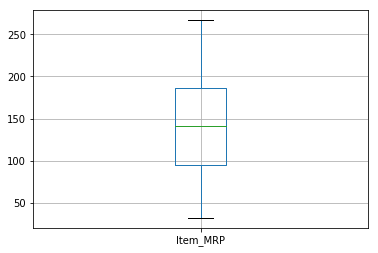

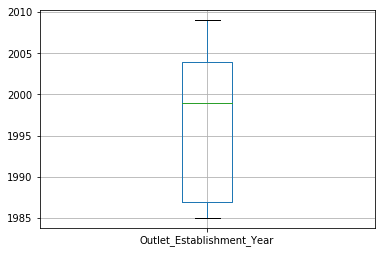

In [226]:
for i in numerical_features:
    df_test.boxplot(i)
    plt.show()

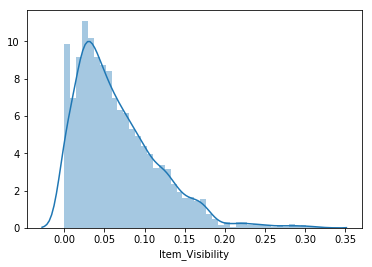

In [229]:
sns.distplot(df_test['Item_Visibility'])
plt.show()

In [230]:
for i in df_test['Item_Visibility']:
    if(i>0.10):
        df_test['Item_Visibility'] = df_test['Item_Visibility'].median()
    else:
        pass

Replaced outliers with the median

In [232]:
for i in numerical_features:
    print(i,df_test[i].skew())

Item_Weight 0.16648861742953053
Item_Visibility 0
Item_MRP 0.13618153880370937
Outlet_Establishment_Year -0.39630647225627247


Except visibility each feature has skewness 

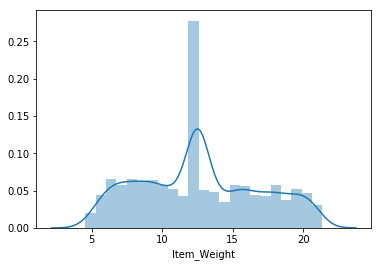

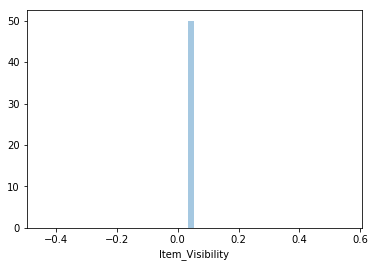

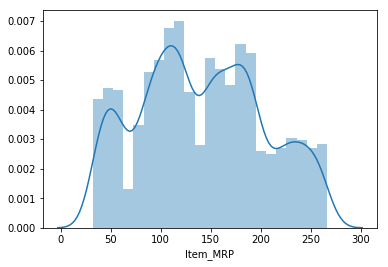

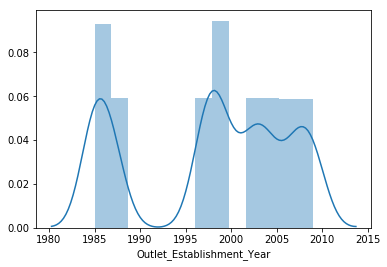

In [233]:
for i in numerical_features:
    sns.distplot(df_test[i])
    plt.show()

In [234]:
df_test['Item_Fat_Content'] = label_encoder.fit_transform(df_test['Item_Fat_Content'])

In [235]:
df_test['Item_Type']= label_encoder.fit_transform(df_test['Item_Type'])

In [236]:
df_test['Outlet_Identifier']= label_encoder.fit_transform(df_test['Outlet_Identifier'])

In [237]:
df_test['Outlet_Size']= label_encoder.fit_transform(df_test['Outlet_Size'])

In [238]:
df_test['Outlet_Location_Type']= label_encoder.fit_transform(df_test['Outlet_Location_Type'])

In [239]:
df_test['Outlet_Type']= label_encoder.fit_transform(df_test['Outlet_Type'])

In [240]:
from sklearn.preprocessing import power_transform
df1 = pd.DataFrame(power_transform(df_test),columns=df_test.columns)

removed skewness

In [242]:
loaded_model = pickle.load(open(bigmart,'rb'))
pre1 = loaded_model.predict(df1)

Loaded model to test the result for test dataset